In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)

In [80]:
cols18 = ['STU_CWID', 'COHORT', 'ORIG_ADM_TYPE', 'DEG1','COL1', 'DORM1', 'SATC_USE','SATM','SATV', 'ACTM','ACTE',
          'ACTC','HS_GPA','RACE_08_09','PERM_STATE', 'PARENT_HAS_DEGR', 'SEX', 'GPA1', 'CLS1']
df_18 = pd.read_excel('../1_data/Retention 18F to 19F preliminary run 7_26.xlsx', usecols = cols18)
df_18.head()

,STU_CWID,SEX,COHORT,RACE_08_09,PERM_STATE,ORIG_ADM_TYPE,PARENT_HAS_DEGR,SATC_USE,SATM,SATV,ACTC,ACTM,ACTE,HS_GPA,GPA1,DEG1,COL1,CLS1,DORM1
0,10281248,F,N,8-WHITE,VT,FA,Y,1140,630,510,0,0,0,3.60,3.740,BS,MA,SR,
1,10285579,M,N,8-WHITE,NH,FA,Y,1110,500,610,24,19,24,3.53,3.517,BM,MA,SR,
2,10281254,M,N,2-HISP,LA,FA,Y,1190,0,0,26,27,23,3.98,3.740,BBA,BU,SR,BIEVR
3,10281266,M,N,8-WHITE,MA,FA,Y,1150,0,0,25,25,23,4.02,3.175,BS,MA,SR,
4,10283318,F,N,8-WHITE,MA,FA,Y,1080,580,500,0,0,0,3.16,3.400,BA,MA,SR,CARRL


In [81]:
df18 = df_18[df_18['COHORT']=="COHORT_FT"]
print(df18['STU_CWID'].nunique())
print(df_18['STU_CWID'].nunique())

760
2997


In [82]:
df18 = df18[df18['CLS1']=="FR"]
print(df18['STU_CWID'].nunique())

751


In [83]:
df18.columns = map(str.lower, df18.columns)
df18.rename(columns={'stu_cwid':'sid'}, inplace = True)
df18.head()

,sid,sex,cohort,race_08_09,perm_state,orig_adm_type,parent_has_degr,satc_use,satm,satv,actc,actm,acte,hs_gpa,gpa1,deg1,col1,cls1,dorm1
437,10308051,M,COHORT_FT,8-WHITE,MA,FB,Y,1080,570,510,0,0,0,2.58,0.00,BBA,BU,FR,BIEVR
440,10300622,F,COHORT_FT,8-WHITE,MA,FC,Y,1300,610,690,0,0,0,4.00,0.00,BA,CAS,FR,BUDIG
441,10310728,M,COHORT_FT,8-WHITE,MA,FA,Y,1110,0,0,24,24,23,2.73,3.62,BS,MA,FR,
443,10308598,F,COHORT_FT,5-ASIAN,MA,FA,N,1000,490,510,0,0,0,3.15,2.70,BA,CAS,FR,BIEVR
444,10308193,M,COHORT_FT,2-HISP,LA,FA,Y,990,0,0,21,20,21,3.86,0.00,BD,MA,FR,


In [84]:
df18['male'] = pd.Series(np.where(df18.sex.values == 'M', 1, 0), df18.index)
print(pd.crosstab(df18['male'], df18['sex']))

sex     F    M
male          
0     472    0
1       0  279


In [85]:
df18.drop(['cohort', 'cls1'], inplace = True, axis = 1)
df18.head()

,sid,sex,race_08_09,perm_state,orig_adm_type,parent_has_degr,satc_use,satm,satv,actc,actm,acte,hs_gpa,gpa1,deg1,col1,dorm1,male
437,10308051,M,8-WHITE,MA,FB,Y,1080,570,510,0,0,0,2.58,0.00,BBA,BU,BIEVR,1
440,10300622,F,8-WHITE,MA,FC,Y,1300,610,690,0,0,0,4.00,0.00,BA,CAS,BUDIG,0
441,10310728,M,8-WHITE,MA,FA,Y,1110,0,0,24,24,23,2.73,3.62,BS,MA,,1
443,10308598,F,5-ASIAN,MA,FA,N,1000,490,510,0,0,0,3.15,2.70,BA,CAS,BIEVR,0
444,10308193,M,2-HISP,LA,FA,Y,990,0,0,21,20,21,3.86,0.00,BD,MA,,1


In [86]:
df18['race_08_09'].value_counts()

8-WHITE    307
2-HISP     162
6-BLACK    137
91-UNK      72
3-MULT      26
5-ASIAN     21
1-INT       20
4-AMIND      4
7-HAWAI      1
9-OTHER      1
Name: race_08_09, dtype: int64

In [87]:
df18['minority'] = 1
df18['minority'][(df18['race_08_09']=="8-WHITE") | (df18['race_08_09']=="1-INT") | 
                (df18['race_08_09']=="3-MULT") | (df18['race_08_09']=="91-UNK")] = 0
pd.crosstab(df18['minority'], df18['race_08_09'])

race_08_09,1-INT,2-HISP,3-MULT,4-AMIND,5-ASIAN,6-BLACK,7-HAWAI,8-WHITE,9-OTHER,91-UNK
minority,,,,,,,,,,
0,20,0,26,0,0,0,0,307,0,72
1,0,162,0,4,21,137,1,0,1,0


In [88]:
df18['intl'] = 0
df18['intl'][df18['race_08_09']=="1-INT"] = 1
pd.crosstab(df18['intl'], df18['race_08_09'])

race_08_09,1-INT,2-HISP,3-MULT,4-AMIND,5-ASIAN,6-BLACK,7-HAWAI,8-WHITE,9-OTHER,91-UNK
intl,,,,,,,,,,
0,0,162,26,4,21,137,1,307,1,72
1,20,0,0,0,0,0,0,0,0,0


In [89]:
df18['instate'] = 0
df18['instate'][df18['perm_state']=="LA"] = 1
pd.crosstab(df18['perm_state'], df18['instate'])

instate,0,1
perm_state,,
,20,0
AL,20,0
AR,2,0
AZ,3,0
CA,44,0
CO,8,0
CT,3,0
DC,3,0
DE,1,0


In [90]:
df18.head()

,sid,sex,race_08_09,perm_state,orig_adm_type,parent_has_degr,satc_use,satm,satv,actc,actm,acte,hs_gpa,gpa1,deg1,col1,dorm1,male,minority,intl,instate
437,10308051,M,8-WHITE,MA,FB,Y,1080,570,510,0,0,0,2.58,0.00,BBA,BU,BIEVR,1,0,0,0
440,10300622,F,8-WHITE,MA,FC,Y,1300,610,690,0,0,0,4.00,0.00,BA,CAS,BUDIG,0,0,0,0
441,10310728,M,8-WHITE,MA,FA,Y,1110,0,0,24,24,23,2.73,3.62,BS,MA,,1,0,0,0
443,10308598,F,5-ASIAN,MA,FA,N,1000,490,510,0,0,0,3.15,2.70,BA,CAS,BIEVR,0,1,0,0
444,10308193,M,2-HISP,LA,FA,Y,990,0,0,21,20,21,3.86,0.00,BD,MA,,1,1,0,1


In [91]:
df18['first_gen'] = pd.Series(np.where(df18.parent_has_degr.values == 'N', 1, 0), df18.index)
print(pd.crosstab(df18['first_gen'], df18['parent_has_degr']))

parent_has_degr       N    Y
first_gen                   
0                2    0  525
1                0  224    0


In [92]:
df18['resident'] = 0
df18['resident'][(df18['dorm1'] == "BIEVR") | (df18['dorm1'] == "BUDIG") | (df18['dorm1'] == "CARRL") | 
                  (df18['dorm1'] == "DBLRM")] = 1
df18['resident'].value_counts()

1    596
0    155
Name: resident, dtype: int64

In [93]:
df18['hs_gpa'].describe()

count    751.000000
mean       3.493688
std        0.548943
min        0.000000
25%        3.130000
50%        3.500000
75%        3.890000
max        4.940000
Name: hs_gpa, dtype: float64

In [94]:
df18['hs_gpa'][df18['hs_gpa'] > 4] = df18['hs_gpa'][df18['hs_gpa'] > 4]*0.8
df18['hs_gpa'].describe()

count    751.000000
mean       3.361870
std        0.435687
min        0.000000
25%        3.130000
50%        3.400000
75%        3.680000
max        4.000000
Name: hs_gpa, dtype: float64

In [95]:
df18['hs_gpa'][df18['hs_gpa'] == 0].count()

2

In [96]:
df18['hs_gpa'][df18['hs_gpa'] != 0].describe()

count    749.000000
mean       3.370846
std        0.400037
min        2.000000
25%        3.130000
50%        3.400000
75%        3.680000
max        4.000000
Name: hs_gpa, dtype: float64

In [97]:
df18['hs_gpa'][df18['hs_gpa'] == 0] = 3.40 # replace with means
df18['hs_gpa'].describe()

count    751.000000
mean       3.370924
std        0.399507
min        2.000000
25%        3.135000
50%        3.400000
75%        3.680000
max        4.000000
Name: hs_gpa, dtype: float64

In [98]:
df18.head()

,sid,sex,race_08_09,perm_state,orig_adm_type,parent_has_degr,satc_use,satm,satv,actc,actm,acte,hs_gpa,gpa1,deg1,col1,dorm1,male,minority,intl,instate,first_gen,resident
437,10308051,M,8-WHITE,MA,FB,Y,1080,570,510,0,0,0,2.58,0.00,BBA,BU,BIEVR,1,0,0,0,0,1
440,10300622,F,8-WHITE,MA,FC,Y,1300,610,690,0,0,0,4.00,0.00,BA,CAS,BUDIG,0,0,0,0,0,1
441,10310728,M,8-WHITE,MA,FA,Y,1110,0,0,24,24,23,2.73,3.62,BS,MA,,1,0,0,0,0,0
443,10308598,F,5-ASIAN,MA,FA,N,1000,490,510,0,0,0,3.15,2.70,BA,CAS,BIEVR,0,1,0,0,1,1
444,10308193,M,2-HISP,LA,FA,Y,990,0,0,21,20,21,3.86,0.00,BD,MA,,1,1,0,1,0,0


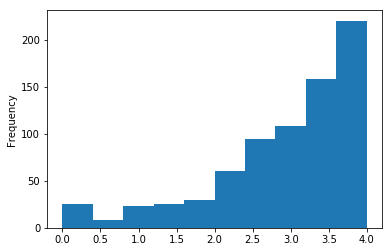

In [99]:
df18['gpa1'].plot.hist();

In [100]:
df18['fa_adm_type'] = pd.Series(np.where(df18.orig_adm_type.values == 'FA', 1, 0), df18.index)
print(pd.crosstab(df18['fa_adm_type'], df18['orig_adm_type']))

orig_adm_type   FA  FB   FC  FE
fa_adm_type                    
0                0  62  162   8
1              519   0    0   0


In [101]:
df18['fc_adm_type'] = pd.Series(np.where(df18.orig_adm_type.values == 'FC', 1, 0), df18.index)
print(pd.crosstab(df18['fc_adm_type'], df18['orig_adm_type']))

orig_adm_type   FA  FB   FC  FE
fc_adm_type                    
0              519  62    0   8
1                0   0  162   0


In [124]:
df18['race'] = df18['race_08_09'].str.split("-", n=1, expand = True)[1]

In [125]:
df18.head()

,sid,sex,race_08_09,perm_state,orig_adm_type,parent_has_degr,satc_use,satm,satv,actc,actm,acte,hs_gpa,gpa1,deg1,col1,dorm1,male,minority,intl,instate,first_gen,resident,fa_adm_type,fc_adm_type,race
437,10308051,M,8-WHITE,MA,FB,Y,1080,570,510,0,0,0,2.58,0.00,BBA,BU,BIEVR,1,0,0,0,0,1,0,0,WHITE
440,10300622,F,8-WHITE,MA,FC,Y,1300,610,690,0,0,0,4.00,0.00,BA,CAS,BUDIG,0,0,0,0,0,1,0,1,WHITE
441,10310728,M,8-WHITE,MA,FA,Y,1110,0,0,24,24,23,2.73,3.62,BS,MA,,1,0,0,0,0,0,1,0,WHITE
443,10308598,F,5-ASIAN,MA,FA,N,1000,490,510,0,0,0,3.15,2.70,BA,CAS,BIEVR,0,1,0,0,1,1,1,0,ASIAN
444,10308193,M,2-HISP,LA,FA,Y,990,0,0,21,20,21,3.86,0.00,BD,MA,,1,1,0,1,0,0,1,0,HISP


In [126]:
df18.drop('race_08_09', axis = 1, inplace = True)

In [127]:
df_final = df18[['sid', 'race', 'sex', 'satc_use', 'hs_gpa', 'gpa1', 'deg1', 'col1', 'male', 'minority', 'intl', 'instate',
                'first_gen', 'resident', 'fa_adm_type', 'fc_adm_type']]
df_final.rename(columns = {'gpa1': 'lgpa1', 'satc_use':'sat'})
df_final['term'] = "18F"
df_final.set_index('sid', inplace=True)
df_final.head()

,race,sex,satc_use,hs_gpa,gpa1,deg1,col1,male,minority,intl,instate,first_gen,resident,fa_adm_type,fc_adm_type,term
sid,,,,,,,,,,,,,,,,
10308051,WHITE,M,1080,2.58,0.00,BBA,BU,1,0,0,0,0,1,0,0,18F
10300622,WHITE,F,1300,4.00,0.00,BA,CAS,0,0,0,0,0,1,0,1,18F
10310728,WHITE,M,1110,2.73,3.62,BS,MA,1,0,0,0,0,0,1,0,18F
10308598,ASIAN,F,1000,3.15,2.70,BA,CAS,0,1,0,0,1,1,1,0,18F
10308193,HISP,M,990,3.86,0.00,BD,MA,1,1,0,1,0,0,1,0,18F


In [132]:
#Add financial and athletic information
#'ATHLETE1', 'PELL_YN', #'NEED', 'BUDGET', 'FAFSA', 'ALLAID_F', 'NEED_RANGE_F'

cols_rnl = ['StudentId','Flag_Pell_Eligible', 'Flag_Roster_Athlete', 'Need', 'Need_Met', 'Budget']
rnl = pd.read_excel('../1_data/408869_2018.09.24 Loyola NO Management Census Research File 2018.xlsx', usecols = cols_rnl)
rnl.head()

,StudentId,Budget,Need,Need_Met,Flag_Roster_Athlete,Flag_Pell_Eligible
0,10312086,47676,0,0.000000,N,N
1,10312087,57290,57290,53.840112,N,Y
2,10312089,47676,0,0.000000,N,N
3,10312092,47676,0,0.000000,N,N
4,10312096,47748,47748,92.977716,N,Y


In [133]:
rnl['Need_Met'] = rnl['Need_Met']/100
rnl['allaid_f'] = rnl['Need']*rnl['Need_Met']
rnl.head()

,StudentId,Budget,Need,Need_Met,Flag_Roster_Athlete,Flag_Pell_Eligible,allaid_f
0,10312086,47676,0,0.000000,N,N,0.0
1,10312087,57290,57290,0.538401,N,Y,30845.0
2,10312089,47676,0,0.000000,N,N,0.0
3,10312092,47676,0,0.000000,N,N,0.0
4,10312096,47748,47748,0.929777,N,Y,44395.0


In [134]:
rnl['athlete'] = pd.Series(np.where(rnl.Flag_Roster_Athlete.values == 'Y', 1, 0), rnl.index)
print(pd.crosstab(rnl['athlete'], rnl['Flag_Roster_Athlete']))

rnl['pell'] = pd.Series(np.where(rnl.Flag_Pell_Eligible.values == 'Y', 1, 0), rnl.index)
print(pd.crosstab(rnl['pell'], rnl['Flag_Pell_Eligible']))

rnl.rename(columns={'StudentId':'sid', 'Budget':'budget', 'Need':'need'}, inplace = True)

Flag_Roster_Athlete     N    Y
athlete                       
0                    4335    0
1                       0  128
Flag_Pell_Eligible     N     Y
pell                          
0                   3181     0
1                      0  1282


In [135]:
rnl.drop(['Need_Met', 'Flag_Roster_Athlete', 'Flag_Pell_Eligible'], axis = 1, inplace = True)
rnl.head()

,sid,budget,need,allaid_f,athlete,pell
0,10312086,47676,0,0.0,0,0
1,10312087,57290,57290,30845.0,0,1
2,10312089,47676,0,0.0,0,0
3,10312092,47676,0,0.0,0,0
4,10312096,47748,47748,44395.0,0,1


In [136]:
rnl.set_index('sid', inplace = True)
rnl.head()

,budget,need,allaid_f,athlete,pell
sid,,,,,
10312086,47676,0,0.0,0,0
10312087,57290,57290,30845.0,0,1
10312089,47676,0,0.0,0,0
10312092,47676,0,0.0,0,0
10312096,47748,47748,44395.0,0,1


In [138]:
final_18 = pd.merge(df_final, rnl, how = 'left', left_index=True, right_index=True)

In [139]:
final_18['pell'].isnull().sum().sum()

0

In [142]:
final_18['pell'].value_counts()

0    455
1    296
Name: pell, dtype: int64

In [143]:
final_18['athlete'].value_counts()

0    696
1     55
Name: athlete, dtype: int64

In [144]:
final_18['budget'].mean()

55022.35818908123

In [145]:
final_18['need'].mean()

34652.42343541944

In [146]:
final_18['allaid_f'].mean()

29304.342210386152

In [147]:
final_18.head()

,race,sex,satc_use,hs_gpa,gpa1,deg1,col1,male,minority,intl,instate,first_gen,resident,fa_adm_type,fc_adm_type,term,budget,need,allaid_f,athlete,pell
sid,,,,,,,,,,,,,,,,,,,,,
10308051,WHITE,M,1080,2.58,0.00,BBA,BU,1,0,0,0,0,1,0,0,18F,57290,57290,36695.0,0,1
10300622,WHITE,F,1300,4.00,0.00,BA,CAS,0,0,0,0,0,1,0,1,18F,57290,31170,28400.0,0,0
10310728,WHITE,M,1110,2.73,3.62,BS,MA,1,0,0,0,0,0,1,0,18F,57290,0,0.0,0,0
10308598,ASIAN,F,1000,3.15,2.70,BA,CAS,0,1,0,0,1,1,1,0,18F,57290,49858,36400.0,0,0
10308193,HISP,M,990,3.86,0.00,BD,MA,1,1,0,1,0,0,1,0,18F,47748,47388,38213.0,0,1


In [148]:
len(final_18.columns)

21

In [149]:
final_18.drop(['sex', 'deg1'], axis =1, inplace=True)

In [150]:
len(final_18.columns)

19

In [153]:
final_18.reset_index(inplace=True)
final_18.rename(columns={'gpa1':'lgpa1', 'satc_use':'sat'}, inplace = True)
print(len(final_18.columns))

21


In [155]:
#final_18.set_index('index', inplace=True)
print(len(final_18.columns))
final_18.head()

20


,sid,race,sat,hs_gpa,lgpa1,col1,male,minority,intl,instate,first_gen,resident,fa_adm_type,fc_adm_type,term,budget,need,allaid_f,athlete,pell
index,,,,,,,,,,,,,,,,,,,,
0,10308051,WHITE,1080,2.58,0.00,BU,1,0,0,0,0,1,0,0,18F,57290,57290,36695.0,0,1
1,10300622,WHITE,1300,4.00,0.00,CAS,0,0,0,0,0,1,0,1,18F,57290,31170,28400.0,0,0
2,10310728,WHITE,1110,2.73,3.62,MA,1,0,0,0,0,0,1,0,18F,57290,0,0.0,0,0
3,10308598,ASIAN,1000,3.15,2.70,CAS,0,1,0,0,1,1,1,0,18F,57290,49858,36400.0,0,0
4,10308193,HISP,990,3.86,0.00,MA,1,1,0,1,0,0,1,0,18F,47748,47388,38213.0,0,1


In [156]:
final_18.to_excel('../3_res/2018.xlsx')